# Prediction home prices

Data for Ames, Iowa, USA from 2006 to 2010 is used for this analysis. It contains 82 columns and 2930 rows of data. The reason for data collection is given at <https://doi.org/10.1080/10691898.2011.11889627>. Data description is given at <https://s3.amazonaws.com/dq-content/307/data_description.txt>. This was created as part of guided project from <https://dataquest.io>

## Initialisation
Loading libraries and data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
%matplotlib inline

In [2]:
houses = pd.read_csv('AmesHousing.tsv', sep='\t')

In [3]:
pd.set_option('display.max_columns', 85)

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [5]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
houses.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071.0,LwQ,123.0,195.0,1389.0,GasA,Gd,Y,SBrkr,1389,0,0,1389,1.0,0.0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1975.0,RFn,2.0,418.0,TA,TA,Y,240,38,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


## Some functions

In [7]:
# Fills null values, drops column swith more than 25% null values, 
# modifies a column, change datatype of columns
def transform_features(df):
    df = df.copy()
    # Remove features with more than 25% missing values.
    limit = 0.25 * len(df)
    features_null_count = df.isnull().sum()
    filt = (features_null_count >= limit)
    features_to_remove = features_null_count[filt].index
    df = df.drop(columns=features_to_remove)
    
    # Min Max scaling of numerical columns
    num_cols = df.select_dtypes('number').columns
    num_cols = num_cols.drop('SalePrice')
    df[num_cols] = (df[num_cols] - df[num_cols].min()) / (df[num_cols].max() - df[num_cols].min())
        
    # Replace nan with 0
    cols = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 
            'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
            'Bsmt Full Bath', 'Bsmt Half Bath']
    df[cols] = df[cols].fillna(value=0)
    
    # Replace nan with 'None'
    cols = ['Mas Vnr Type', 'Garage Type', 'Garage Yr Blt', 
            'Garage Finish', 'Garage Qual', 'Garage Cond']
    df[cols] = df[cols].fillna(value='None')
    
    # Replace nan with median value
    cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
            'BsmtFin Type 1' , 'BsmtFin Type 2', 'Electrical', 
            'Garage Cars', 'Garage Area']
    df[cols] = df[cols].fillna(value=df[cols].mode().iloc[0])
    
    # Modify Column
    years_since_remodeled = houses['Yr Sold'] - houses['Year Remod/Add']
    df.insert(21, 'years_since_remodeled', years_since_remodeled)
    df = df.drop(columns='Year Remod/Add')
    
    # Convert certain columns to category type
    cols = ['MS SubClass', 'Overall Qual', 'Overall Cond']
    df[cols] = df[cols].astype('object')
    
    return df

In [8]:
# Select the required features. Convert the category values to dummy columns.
def select_features(df):
    df = df.copy()
    
    target = 'SalePrice'
    num_cols =  ['Lot Area', '2nd Flr SF', 'Bsmt Full Bath', 
                 'Half Bath', 'Open Porch SF', 'Wood Deck SF', 
                 'Lot Frontage', 'BsmtFin SF 1', 'Fireplaces', 
                 'TotRms AbvGrd', 'Mas Vnr Area', 'Full Bath', 
                 'Year Built', 'years_since_remodeled', '1st Flr SF', 
                 'Garage Cars']
    # Minor changes categorical columns
    obj_cols1 = ['Overall Qual', 'Lot Shape', 'Heating QC', 
                'Garage Finish']
    
    # Conver to dummy as is
    obj_cols2 = ['Neighborhood', 'Exterior 1st', 'Mas Vnr Type']
    
    # Conver to dummy and retain of certain columns
    obj_cols3 = ['Foundation', 'Bsmt Qual', 'Kitchen Qual', 'Garage Type']
    
    # Covert Lot Shape to 1 or 0. 1 refers to regular plot.
    df['Lot Shape'] = df['Lot Shape'].apply(lambda x: 1 if (x == 'Reg') else 0)
    
    # Convert Garage finish to 1 or 0 values.
    df['Garage Finish'] = df['Garage Finish'].apply(lambda x: 0 if (x in ['Unf', 'None']) else 1)
    
    # Covert Heating QC to 1 or 0. 1 refers to Ex.
    df['Heating QC'] = df['Heating QC'].apply(lambda x: 1 if (x == 'Ex') else 0)
    
    # Convert to dummy columns and keep only certain columns
    dummy_cols3 = pd.get_dummies(df[obj_cols3])
    cols = ['Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
            'Bsmt Qual_Gd', 'Bsmt Qual_Ex', 'Bsmt Qual_TA',
            'Kitchen Qual_Gd', 'Kitchen Qual_Ex', 'Kitchen Qual_TA', 
            'Garage Type_Attchd', 'Garage Type_BuiltIn', 'Garage Type_Detchd', 
            'Garage Type_None']
    
    dummy_cols3 = dummy_cols3[cols]
    
    dummy_cols2 = pd.get_dummies(df[obj_cols2])
    
    final_cols = [df[num_cols], df[obj_cols1], dummy_cols2, 
                  dummy_cols3, df[target]]
    
    select_df = pd.concat(final_cols, axis=1)
    
    return select_df

In [9]:
# function to test and train
def train_and_test(df, k):
    df = df.copy()
    df = select_features(df)
    target = 'SalePrice'
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        return linear_train(train, test, target)
    elif k == 1:
        df = df.loc[np.random.permutation(df.index), :]
        fold_one = df[:1460]
        fold_two = df[1460:]
        rmse1 = linear_train(fold_one, fold_two, target)
        rmse2 = linear_train(fold_two, fold_one, target)
        return np.mean([rmse1, rmse2])
    else:
        model = LinearRegression()
        kf = KFold(k, shuffle=True, random_state=1)
        mses = cross_val_score(model, df.drop(columns=target), 
                               df[target],
                               scoring='neg_mean_squared_error', 
                               cv=kf)
        rmse = np.round(np.mean(np.sqrt(np.abs(mses))), 2)
        return rmse
    

def linear_train(train_df, test_df, target):
    # Train the model
    lr = LinearRegression()
    lr.fit(train_df.drop(columns=target), train_df[[target]])

    predictions = lr.predict(test_df.drop(columns=target))

    error = predictions - test_df[[target]]
    rmse = np.sqrt(np.mean(np.square(error)))
    #rmse = rmse.reset_index(drop=True)
    #rmse.rename('RMSE')
    return rmse.round(2).iloc[0]

## Feature exploration
Each feature in the data set is explored in the following section

In [10]:
houses.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [11]:
# Find columns with more than 25% missing values.
# 25% of 2930 is 732 
houses.isnull().sum().sort_values()

Order                 0
Sale Condition        0
Heating QC            0
Central Air           0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
Foundation            0
TotRms AbvGrd         0
Fireplaces            0
Paved Drive           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Misc Val              0
Mo Sold               0
Yr Sold               0
Sale Type             0
Functional            0
Exter Cond            0
Heating               0
                   ... 
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Electrical            1
BsmtFin SF 1          1
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Garage Cars           1
Garage Area           1
Bsmt Half Bath  

Following features have more than 25% missing values - `Fireplace Qu, Fence, Alley, Misc Feature, Pool QC`. 25% is an arbitary limit.

In [12]:
houses['Pool QC'].value_counts(dropna=False)

NaN    2917
Ex        4
Gd        4
TA        3
Fa        2
Name: Pool QC, dtype: int64

In [13]:
houses[houses['Pool QC'].isnull()]['Pool Area'].unique()

array([0])

Column `Pool QC` with `NaN` correspond to columns with `Pool Area` of `0`. By removing `Pool QC` data is not lost related to availability of pool. Similary `Misc Feature` is captured in `Misc Value`. Other three columns with more than 25% values can be also removed.

In [14]:
columns_not_null = houses.isnull().sum()[houses.isnull().sum() == 0].index
print(columns_not_null, len(columns_not_null))
houses[columns_not_null].describe()
    

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Heating',
       'Heating QC', 'Central Air', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Paved Drive', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice'],
      dtype='object') 55


,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,10147.921843,6.094881,5.563140,1971.356314,1984.266553,1159.557679,335.455973,4.676792,1499.690444,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,7880.017759,1.411026,1.111537,30.245361,20.860286,391.890885,428.395715,46.310510,505.508887,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,876.250000,0.000000,0.000000,1126.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,1084.000000,0.000000,0.000000,1442.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,1384.000000,703.750000,0.000000,1742.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,2065.000000,1064.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


There are **55** columns with no missing values. 
**28** Columns contain only numerical values.

Following **3** columns contain numberical values but are categorical.
* MS SubClass
* Overall Qual
* Overall Cond

Following **13** columns do no appear to have problem and have numerical value.
* Lot Area
* 1st Flr SF
* 2nd Flr SF
* Low Qual Fin SF
* GR Liv Area
* Wood Deck SF
* Open Porch SF
* Enclosed Porch
* 3Ssn Porch
* Screen Porch	
* Pool Area
* Misc Val	
* SalePrice

Following **9** columns have int values
* Order
* PID
* Year Built
* Full Bath
* Half Bath
* Bedroom AbvGr
* Kitchen AbvGr
* TotRms AbvGrd
* Fireplaces

Following **3** columns to be modified
* Year Remod/Add
* Mo Sold
* Yr Sold

In [15]:
# Object columns with no missing values
cols1 = ['MS Zoning', 'Street', 'Lot Shape', 
         'Land Contour', 'Utilities', 'Lot Config', 
         'Land Slope', 'Neighborhood', 'Condition 1']

cols2 = ['Condition 2', 'Bldg Type', 'House Style', 
         'Roof Style', 'Roof Matl', 'Exterior 1st',
         'Exterior 2nd', 'Exter Qual', 'Exter Cond']

cols3 = ['Foundation', 'Heating', 'Heating QC', 
         'Central Air', 'Kitchen Qual', 'Functional', 
         'Paved Drive', 'Sale Type', 'Sale Condition']


houses[cols1].describe()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1
count,2930,2930,2930,2930,2930,2930,2930,2930,2930
unique,7,2,4,4,3,5,3,28,9
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm
freq,2273,2918,1859,2633,2927,2140,2789,443,2522


In [16]:
houses[cols2].describe()

,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond
count,2930,2930,2930,2930,2930,2930,2930,2930,2930
unique,8,5,8,6,8,16,17,4,5
top,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA
freq,2900,2425,1481,2321,2887,1026,1015,1799,2549


In [17]:
houses[cols3].describe()

,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive,Sale Type,Sale Condition
count,2930,2930,2930,2930,2930,2930,2930,2930,2930
unique,6,6,5,2,5,8,3,10,6
top,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
freq,1310,2885,1495,2734,1494,2728,2652,2536,2413


These **27** columns do not have any problem. They are categorical values and can be converted to dummy columns.

Till now analysis has covered **5** columns with more than 25% missing values. **55** columns with no missing values. That leaves with **22** columns remaining.

In [18]:
houses['Order']

0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
        ... 
2900    2901
2901    2902
2902    2903
2903    2904
2904    2905
2905    2906
2906    2907
2907    2908
2908    2909
2909    2910
2910    2911
2911    2912
2912    2913
2913    2914
2914    2915
2915    2916
2916    2917
2917    2918
2918    2919
2919    2920
2920    2921
2921    2922
2922    2923
2923    2924
2924    2925
2925    2926
2926    2927
2927    2928
2928    2929
2929    2930
Name: Order, Length: 2930, dtype: int64

`Order` column is just index. This column is not useful to the analysis.

In [19]:
houses['PID']

0       526301100
1       526350040
2       526351010
3       526353030
4       527105010
5       527105030
6       527127150
7       527145080
8       527146030
9       527162130
10      527163010
11      527165230
12      527166040
13      527180040
14      527182190
15      527216070
16      527225035
17      527258010
18      527276150
19      527302110
20      527358140
21      527358200
22      527368020
23      527402200
24      527402250
25      527403020
26      527404120
27      527425090
28      527427230
29      527451180
          ...    
2900    916477010
2901    921205030
2902    921205050
2903    923125030
2904    923202025
2905    923203090
2906    923203100
2907    923205120
2908    923225190
2909    923225240
2910    923225260
2911    923225510
2912    923226150
2913    923226180
2914    923226290
2915    923227100
2916    923228130
2917    923228180
2918    923228210
2919    923228260
2920    923228310
2921    923229110
2922    923230040
2923    923250060
2924    92

In [20]:
houses['PID'].value_counts().sort_values()

532351060    1
527110020    1
527450080    1
534427090    1
532353020    1
905104180    1
535126010    1
909254010    1
527454200    1
533254110    1
903233030    1
905101300    1
905100020    1
535425010    1
906203120    1
923230190    1
905200010    1
906412010    1
916384050    1
902207080    1
907227100    1
535302080    1
528228290    1
909176180    1
528458180    1
905476120    1
902402010    1
902136110    1
528175060    1
906392090    1
            ..
527450460    1
527450150    1
533208040    1
535425060    1
532477030    1
528480150    1
528429120    1
532353050    1
923228420    1
528186130    1
535105090    1
534151090    1
535126040    1
535355100    1
533242030    1
906412050    1
535325090    1
535425040    1
527325070    1
528429070    1
909282060    1
535175180    1
916455050    1
905452040    1
535403030    1
528228360    1
527250040    1
534278150    1
534450180    1
527106050    1
Name: PID, Length: 2930, dtype: int64

`PID` appears to be a unique ID associated with each transaction. Not useful for analysis.

In [21]:
# Remaining columns
filt = (houses.isnull().sum() > 0) & (houses.isnull().sum() < 732)
columns_with_null = houses.isnull().sum()[filt].index
print(columns_with_null, len(columns_with_null))

Index(['Lot Frontage', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond'],
      dtype='object') 22


In [22]:
houses['Lot Frontage'].isnull().sum()

490

In [23]:
houses['Lot Frontage'].unique()

array([141.,  80.,  81.,  93.,  74.,  78.,  41.,  43.,  39.,  60.,  75.,
        nan,  63.,  85.,  47., 152.,  88., 140., 105.,  65.,  70.,  26.,
        21.,  53.,  24., 102.,  98.,  83.,  94.,  95.,  90.,  79., 100.,
        44., 110.,  61.,  36.,  67., 108.,  59.,  92.,  58.,  56.,  73.,
        72.,  84.,  76.,  50.,  55.,  68., 107.,  25.,  30.,  57.,  40.,
        77., 120., 137.,  87., 119.,  64.,  96.,  71.,  69.,  52.,  51.,
        54.,  86., 124.,  82.,  38.,  48.,  89.,  66.,  45.,  35., 129.,
        31.,  42.,  28.,  99., 104.,  97., 103.,  34., 117., 149., 122.,
        62., 174., 106., 112.,  32., 115., 128.,  91.,  33., 121., 144.,
       130., 109., 150., 113., 125., 101.,  46., 114., 135., 136.,  37.,
        22., 313.,  49., 123., 160., 195., 118., 134., 182., 116., 138.,
       155., 126., 200., 168., 111., 131., 153., 133.])

`Lot Frontage` column with `NaN` value is equivalent as `0` frontage. So `NaN` values can be replaced with `0`

In [24]:
cols = ['Mas Vnr Type', 'Mas Vnr Area']
houses[cols]

,Mas Vnr Type,Mas Vnr Area
0,Stone,112.0
1,None,0.0
2,BrkFace,108.0
3,None,0.0
4,None,0.0
5,BrkFace,20.0
6,None,0.0
7,None,0.0
8,None,0.0
9,None,0.0


In [25]:
print(houses['Mas Vnr Type'].isnull().sum())
print(houses['Mas Vnr Area'].isnull().sum())
print(houses['Mas Vnr Area'].isnull().sum()/len(houses))

23
23
0.007849829351535836


0.7% of the values are missing. Or its not missing and these houses do not contain masonary veneer.

In [26]:
cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
        'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 
        'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']

houses[cols].head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
0,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0
1,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0
2,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0
3,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0
4,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0


In [27]:
cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
        'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 
        'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']

houses[cols].isnull().sum()

Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin SF 1       1
BsmtFin Type 2    81
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
dtype: int64

In [28]:
houses[houses['Total Bsmt SF'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


* `Bsmt Unf SF` column can be removed. As this is represented in the column `Total Bsmt SF`
* `BsmtFin SF 1, BsmtFin SF 2, Total Bsmt SF` row with missing value can be replaced with zero.
* 2.7% of values in other columns are missing `Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2`. This can be filled with the most frequent value. Then converted to category type and then dummy. 

In [29]:
houses[houses['Electrical'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,1578,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


Only one row has missing value. Can be filled with most frequent value.

In [30]:
cols = ['Bsmt Full Bath', 'Bsmt Half Bath']

houses[houses['Bsmt Full Bath'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [31]:
houses[houses['Bsmt Full Bath'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [32]:
print(houses[houses['Bsmt Full Bath'] != 0].shape)
print(houses[houses['Bsmt Half Bath'] != 0].shape)

(1223, 82)
(177, 82)


There are two rows with `Bsmt Full Bath, Bsmt Half Bath` as missing values. Can be replaced with 0

In [33]:
cols = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 
        'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']

houses[cols].isnull().sum()

Garage Type      157
Garage Yr Blt    159
Garage Finish    159
Garage Cars        1
Garage Area        1
Garage Qual      159
Garage Cond      159
dtype: int64

In [34]:
houses['Garage Type'].value_counts(dropna=False)

Attchd     1731
Detchd      782
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

In [35]:
houses[cols][houses['Garage Type'].isnull()]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
27,NaN,NaN,NaN,0.0,0.0,NaN,NaN
119,NaN,NaN,NaN,0.0,0.0,NaN,NaN
125,NaN,NaN,NaN,0.0,0.0,NaN,NaN
129,NaN,NaN,NaN,0.0,0.0,NaN,NaN
130,NaN,NaN,NaN,0.0,0.0,NaN,NaN
170,NaN,NaN,NaN,0.0,0.0,NaN,NaN
171,NaN,NaN,NaN,0.0,0.0,NaN,NaN
186,NaN,NaN,NaN,0.0,0.0,NaN,NaN
203,NaN,NaN,NaN,0.0,0.0,NaN,NaN
206,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [36]:
houses[(houses['Garage Type'].notnull()) & (houses['Garage Yr Blt'].isnull())]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1356,1357,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal,160000
2236,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


* `Garage Cars, Garage Area` has one row with value missing. It has a detached garage. So these rows with be filled with most frequent value.
* `Garage Type, Garage Yr Blt, Garage Finish, Garage Qual, Garage Cond` has 157 rows with missing values. These are houses with no garage, so it makes sense that these values are missing. Shall be kept as it is.

In [37]:
houses['Yr Sold'].describe()

count    2930.000000
mean     2007.790444
std         1.316613
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: Yr Sold, dtype: float64

**Columns to remove as it adds no value**
* Order
* PID
* Yr Sold / Mo Sold - all houses are sold between 2006 and 2010. It does not add anything to the model.

**Columns to be coverted to category data**
* MS SubClass
* Overall Qual
* Overall Cond

**Columns categorised as category data**

Name|Name|Name|Name|Name
----|----|----|----|----
MS Zoning|Street|Lot Shape|Land Contour|Utilities
Lot Config|Land Slope|Neighborhood|Condition 1|Condition 2
Bldg Type|House Style|Roof Style|Roof Matl|Exterior 1st
Exterior 2nd|Exter Qual|Exter Cond|Foundation|Heating
Heating QC|Central Air|Kitchen Qual|Functional|Paved Drive
Sale Type|Sale Condition|||

**Columns where `NaN` values to be filled**
* `Lot frontage` - `490 NaN` replaced with `0`
* `BsmtFin SF 1, BsmtFin SF 2, Total Bsmt SF` - `1 NaN` replaced with `0`
* `Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2` - `80 NaN` value to be replaced with most frequent value.
* `Bsmt Full Bath, Bsmt Half Bath` - `2 NaN` replaced with `0`
* `Garage Cars, Garage Area` - `1 NaN` value to be replaced with most frequent value.

**Columns which require no updates**

Name|Name|Name|Name|Name
----|----|----|----|----
Lot Area|1st Flr SF|2nd Flr SF|Low Qual Fin SF|GR Liv Area
Wood Deck SF|Open Porch SF|Enclosed Porch|3Ssn Porch|Screen Porch	
Pool Area|Misc Val|Year Built|Full Bath|Half Bath
Bedroom AbvGr|Kitchen AbvGr|TotRms AbvGrd|Fireplaces|SalePrice

**Columns to be modified**
* Year Remod/Add

32


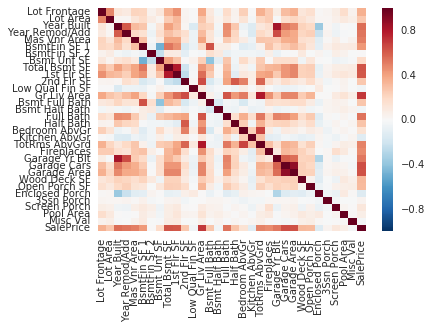

In [38]:
num_cols = houses.select_dtypes(include=np.number)
num_cols_exclude = ['Order', 'PID', 'Mo Sold', 
                    'Yr Sold', 'MS SubClass', 'Overall Qual',
                    'Overall Cond', 'Fireplace Qu', 'Fence, Alley', 
                    'Misc Feature', 'Pool QC']
num_cols_names = [x for x in num_cols.columns if x not in num_cols_exclude]
print(len(num_cols_names))

sns.heatmap(houses[num_cols_names].corr())

There are too many numerical features. Lets check the correlation value with the target column - `SalePrice`

In [39]:
houses[num_cols_names].corr()['SalePrice'].abs().sort_values()

BsmtFin SF 2       0.005891
Misc Val           0.015691
3Ssn Porch         0.032225
Bsmt Half Bath     0.035835
Low Qual Fin SF    0.037660
Pool Area          0.068403
Screen Porch       0.112151
Kitchen AbvGr      0.119814
Enclosed Porch     0.128787
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0.706780
SalePrice          1.000000
Name: SalePrice, dtype: float64

In [40]:
(houses['BsmtFin SF 2'] != 0).value_counts()

False    2578
True      352
Name: BsmtFin SF 2, dtype: int64

In [41]:
houses['BsmtFin Type 2'].value_counts(dropna=False)

Unf    2499
Rec     106
LwQ      89
NaN      81
BLQ      68
ALQ      53
GLQ      34
Name: BsmtFin Type 2, dtype: int64

Only 12% of rows have a value for `BsmtFin SF 2`. It is `0` for rest of the values. So this column can be dropped as it won't affect the final price. In the same way, 85% of values in category `BsmtFin Type 2` is `Unf`. So this column is also dropped together with it.

In [42]:
(houses['Misc Val'] != 0).value_counts()

False    2827
True      103
Name: Misc Val, dtype: int64

In [43]:
houses['Misc Feature'].value_counts(dropna=False)

NaN     2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: Misc Feature, dtype: int64

96% of `Misc Feature` is empty. So this column is dropped along with column `Misc Val`.

In [44]:
(houses[['3Ssn Porch', 'Enclosed Porch', 'Open Porch SF', 'Screen Porch']] == 0).sum()/len(houses)

3Ssn Porch        0.987372
Enclosed Porch    0.843345
Open Porch SF     0.443686
Screen Porch      0.912628
dtype: float64

`3Ssn Porch, Enclosed Porch, Screen Porch` are not included for 98%, 84% and 91% of the values. It also has low correlation. Hence removed.

In [45]:
houses['Kitchen AbvGr'].value_counts()

1    2796
2     129
0       3
3       2
Name: Kitchen AbvGr, dtype: int64

95% of units have 1 kitchen. Not a relevant factor in analysis

In [46]:
cols = ['Bsmt Half Bath', 'Low Qual Fin SF', 'Pool Area']
(houses[cols] == 0).sum()/len(houses)

Bsmt Half Bath     0.939590
Low Qual Fin SF    0.986348
Pool Area          0.995563
dtype: float64

In [47]:
houses[['Bedroom AbvGr', 'TotRms AbvGrd']].corr()

,Bedroom AbvGr,TotRms AbvGrd
Bedroom AbvGr,1.000000,0.672647
TotRms AbvGrd,0.672647,1.000000


`Bedroom AbvGr` has low correlation with `SalePrice` but at the same time has correlation with `TotRms AbvGrd`. This column will be hence dropped.

In [48]:
cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']
houses[cols].corr()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
BsmtFin SF 1,1.000000,-0.054129,-0.477875,0.536547
BsmtFin SF 2,-0.054129,1.000000,-0.238617,0.089958
Bsmt Unf SF,-0.477875,-0.238617,1.000000,0.411726
Total Bsmt SF,0.536547,0.089958,0.411726,1.000000


`Total Bsmt SF` is sum of `Bsmt SF 1, 2, Unf`. `SF 1 and Unf` are hence removed along with `BsmtFin Type 1`

Columns to be dropped due to low correlation (<20%). **15 Columns**
* BsmtFin SF 2, BsmtFin Type 2, Bsmt Unf SF, Bsmt SF 1, BsmtFin Type 1
* Misc Feature, Misc Val
* 3Ssn Porch, Enclosed Porch, Screen Porch
* Kitchen AbvGr, Bsmt Half Bath, Low Qual Fin SF, Pool Area
* Bedroom AbvGr

21


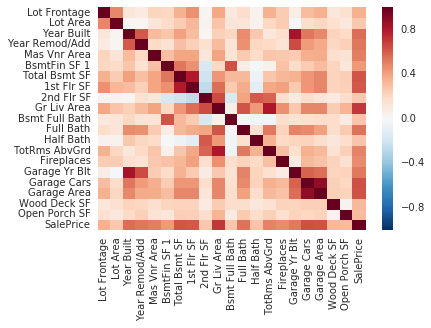

In [49]:
num_cols = houses.select_dtypes(include=np.number)
num_cols_exclude = ['Order', 'PID', 'Mo Sold', 
                    'Yr Sold', 'MS SubClass', 'Overall Qual',
                    'Overall Cond', 'Fireplace Qu', 'Fence, Alley', 
                    'Misc Feature', 'Pool QC', 'BsmtFin SF 2', 
                    'BsmtFin Type 2', 'Bsmt Unf SF', 'Bsmt SF 1', 
                    'BsmtFin Type 1', 'Misc Feature', 'Misc Val',
                    '3Ssn Porch', 'Enclosed Porch', 'Screen Porch',
                    'Kitchen AbvGr', 'Bsmt Half Bath', 'Low Qual Fin SF', 
                    'Pool Area', 'Bedroom AbvGr']
num_cols_names = [x for x in num_cols.columns if x not in num_cols_exclude]
print(len(num_cols_names))

sns.heatmap(houses[num_cols_names].corr())

In [50]:
garage_diff = houses['Year Built'] - houses['Garage Yr Blt']
garage_diff[garage_diff < 0].sort_values()

2260   -201.0
1306   -123.0
185    -113.0
2001   -106.0
2666   -101.0
1981   -100.0
207     -99.0
1316    -98.0
940     -98.0
661     -98.0
1320    -95.0
2644    -93.0
699     -93.0
2036    -91.0
2691    -91.0
2066    -89.0
2025    -88.0
748     -87.0
189     -86.0
2641    -85.0
2842    -85.0
1368    -85.0
902     -85.0
2603    -83.0
2857    -83.0
1989    -82.0
1526    -80.0
1285    -79.0
1413    -78.0
2557    -78.0
        ...  
1576     -1.0
1574     -1.0
1573     -1.0
1074     -1.0
1075     -1.0
1076     -1.0
1091     -1.0
1110     -1.0
1120     -1.0
2092     -1.0
2596     -1.0
1126     -1.0
1129     -1.0
1136     -1.0
1151     -1.0
1154     -1.0
1176     -1.0
1216     -1.0
1253     -1.0
1326     -1.0
2489     -1.0
2890     -1.0
1452     -1.0
2400     -1.0
1471     -1.0
2367     -1.0
2320     -1.0
2316     -1.0
957      -1.0
2928     -1.0
Length: 526, dtype: float64

In [51]:
cols = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt']
houses[cols].loc[garage_diff[garage_diff < 0].sort_values().iloc[:100].index]

,Year Built,Year Remod/Add,Garage Yr Blt
2260,2006,2007,2207.0
1306,1880,2002,2003.0
185,1890,2002,2003.0
2001,1890,1998,1996.0
2666,1892,1993,1993.0
1981,1900,2006,2000.0
207,1900,1996,1999.0
1316,1905,2000,2003.0
940,1900,1993,1998.0
661,1910,2008,2008.0


`Garage Yr Blt` is correalted to `Year Built` or `Year Remod/Add`. Hence removed from further analysis.

In [52]:
cols = ['Total Bsmt SF', '1st Flr SF']
houses[cols].corr()

,Total Bsmt SF,1st Flr SF
Total Bsmt SF,1.00000,0.80072
1st Flr SF,0.80072,1.00000


There is good correlation between `Total Bsmt SF` and `1st Flr SF`. `Total Bsmt SF` will be hence removed.

In [53]:
cols = ['Bsmt Full Bath', 'BsmtFin SF 1']
houses[cols].corr()

,Bsmt Full Bath,BsmtFin SF 1
Bsmt Full Bath,1.00000,0.64002
BsmtFin SF 1,0.64002,1.00000


In [54]:
houses['Bsmt Full Bath'].value_counts()

0.0    1707
1.0    1181
2.0      38
3.0       2
Name: Bsmt Full Bath, dtype: int64

In [55]:
cols = ['Garage Area', 'Garage Cars']
houses[cols].corr()

,Garage Area,Garage Cars
Garage Area,1.000000,0.889676
Garage Cars,0.889676,1.000000


There is good correlation between `Garage Area` and `Garage Cars`. People would generally look for number of cars that can be stored rather than area. So `Garage Area` column is removed.

In [56]:
cols = ['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area']
houses[cols].corr()

,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area
Total Bsmt SF,1.000000,0.800720,-0.205345,0.444675
1st Flr SF,0.800720,1.000000,-0.250057,0.562166
2nd Flr SF,-0.205345,-0.250057,1.000000,0.655251
Gr Liv Area,0.444675,0.562166,0.655251,1.000000


In [57]:
cols = ['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area']
houses[cols]

,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area
0,1080.0,1656,0,1656
1,882.0,896,0,896
2,1329.0,1329,0,1329
3,2110.0,2110,0,2110
4,928.0,928,701,1629
5,926.0,926,678,1604
6,1338.0,1338,0,1338
7,1280.0,1280,0,1280
8,1595.0,1616,0,1616
9,994.0,1028,776,1804


`Gr Liv Area` is sum of `1st Flr SF and 2nd Flr SF`. There is no value additione here with this column. So this column will be removed.

In [58]:
houses['Half Bath'].value_counts()

0    1843
1    1062
2      25
Name: Half Bath, dtype: int64

In [59]:
houses[['Half Bath', 'Full Bath', 'Bedroom AbvGr']].corr()

,Half Bath,Full Bath,Bedroom AbvGr
Half Bath,1.000000,0.159689,0.247053
Full Bath,0.159689,1.000000,0.359489
Bedroom AbvGr,0.247053,0.359489,1.000000


Columns removed due to similar values
* Garage Yr Built
* Total Bsmt SF
* Garage Area
* Gr Liv Area

In [60]:
# A new feature
years_since_remodeled = houses['Yr Sold'] - houses['Year Remod/Add']

Instead of using `Year Remod/Add`, the number of years since last remodeled is considered since latest remodeled houeses would fetch better prices. 

16


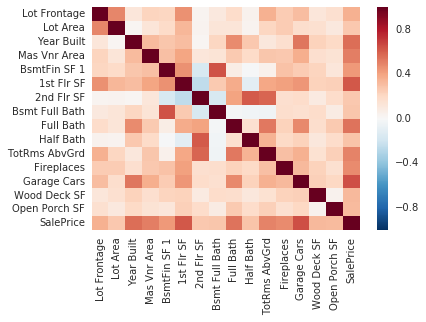

In [61]:
num_cols = houses.select_dtypes(include=np.number)
num_cols_exclude = ['Order', 'PID', 'Mo Sold', 
                    'Yr Sold', 'MS SubClass', 'Overall Qual',
                    'Overall Cond', 'Fireplace Qu', 'Fence, Alley', 
                    'Misc Feature', 'Pool QC', 'BsmtFin SF 2', 
                    'BsmtFin Type 2', 'Bsmt Unf SF', 'Bsmt SF 1', 
                    'BsmtFin Type 1', 'Misc Feature', 'Misc Val',
                    '3Ssn Porch', 'Enclosed Porch', 'Screen Porch',
                    'Kitchen AbvGr', 'Bsmt Half Bath', 'Low Qual Fin SF', 
                    'Pool Area', 'Bedroom AbvGr', 'Garage Yr Blt',
                    'Total Bsmt SF', 'Garage Area', 'Gr Liv Area',
                    'Year Remod/Add']
num_cols_names = [x for x in num_cols.columns if x not in num_cols_exclude]
print(len(num_cols_names))

sns.heatmap(houses[num_cols_names].corr())

In [62]:
cols = ['Lot Frontage', 'Lot Area', 'SalePrice']
houses[cols].corr()

,Lot Frontage,Lot Area,SalePrice
Lot Frontage,1.000000,0.491313,0.357318
Lot Area,0.491313,1.000000,0.266549
SalePrice,0.357318,0.266549,1.000000


In [63]:
houses[num_cols_names].corr()['SalePrice'].sort_values()

Lot Area          0.266549
2nd Flr SF        0.269373
Bsmt Full Bath    0.276050
Half Bath         0.285056
Open Porch SF     0.312951
Wood Deck SF      0.327143
Lot Frontage      0.357318
BsmtFin SF 1      0.432914
Fireplaces        0.474558
TotRms AbvGrd     0.495474
Mas Vnr Area      0.508285
Full Bath         0.545604
Year Built        0.558426
1st Flr SF        0.621676
Garage Cars       0.647877
SalePrice         1.000000
Name: SalePrice, dtype: float64

Correlation less than 40% maybe removed from the analysis. `Lot Frontage, Wood Deck SF, Open Porsch SF, Half Bath, Bsmt Full Bath, Lot Area`

`2nd Flr SF` will not be removed as `Gr Liv Area` was removed earlier. So removing this feature will remove important information about being 2 storey house.

In the next section, rest of the categorical columns will be analysed. 

In [64]:
non_num_cols = houses.select_dtypes(include=np.object)
cols_drop = ['Fireplace Qu', 'Fence', 'Alley', 'Misc Feature', 
             'Pool QC', 'BsmtFin Type 2']
non_num_cols = non_num_cols.drop(columns=cols_drop)
print(len(non_num_cols.columns))
cols = ['MS SubClass', 'Overall Qual', 'Overall Cond']
non_num_cols = non_num_cols.join(houses[cols])

37


In [65]:
# Convert all to category type
non_num_cols = non_num_cols.astype('object')

In [66]:
non_num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 40 columns):
MS Zoning         2930 non-null object
Street            2930 non-null object
Lot Shape         2930 non-null object
Land Contour      2930 non-null object
Utilities         2930 non-null object
Lot Config        2930 non-null object
Land Slope        2930 non-null object
Neighborhood      2930 non-null object
Condition 1       2930 non-null object
Condition 2       2930 non-null object
Bldg Type         2930 non-null object
House Style       2930 non-null object
Roof Style        2930 non-null object
Roof Matl         2930 non-null object
Exterior 1st      2930 non-null object
Exterior 2nd      2930 non-null object
Mas Vnr Type      2907 non-null object
Exter Qual        2930 non-null object
Exter Cond        2930 non-null object
Foundation        2930 non-null object
Bsmt Qual         2850 non-null object
Bsmt Cond         2850 non-null object
Bsmt Exposure     2847 non-null obj

There are 40 (36+4) columns with object values. Missing rows will be filled with median values. It will be then converted to dummy values and then correlation will be checked. But before NaN values are filled.

In [67]:
# 
non_num_cols['Mas Vnr Type'] = non_num_cols['Mas Vnr Type'].fillna('None')

In [68]:
cols = ['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1']
non_num_cols[cols] = non_num_cols[cols].fillna('None')

In [69]:
non_num_cols['Bsmt Exposure'].describe()

count     2847
unique       4
top         No
freq      1906
Name: Bsmt Exposure, dtype: object

In [70]:
non_num_cols['Bsmt Exposure'] = non_num_cols['Bsmt Exposure'].fillna('No')

In [71]:
cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
non_num_cols[cols] = non_num_cols[cols].fillna(value='No')

In [72]:
non_num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 40 columns):
MS Zoning         2930 non-null object
Street            2930 non-null object
Lot Shape         2930 non-null object
Land Contour      2930 non-null object
Utilities         2930 non-null object
Lot Config        2930 non-null object
Land Slope        2930 non-null object
Neighborhood      2930 non-null object
Condition 1       2930 non-null object
Condition 2       2930 non-null object
Bldg Type         2930 non-null object
House Style       2930 non-null object
Roof Style        2930 non-null object
Roof Matl         2930 non-null object
Exterior 1st      2930 non-null object
Exterior 2nd      2930 non-null object
Mas Vnr Type      2930 non-null object
Exter Qual        2930 non-null object
Exter Cond        2930 non-null object
Foundation        2930 non-null object
Bsmt Qual         2930 non-null object
Bsmt Cond         2930 non-null object
Bsmt Exposure     2930 non-null obj

There are no null values present in the columns.

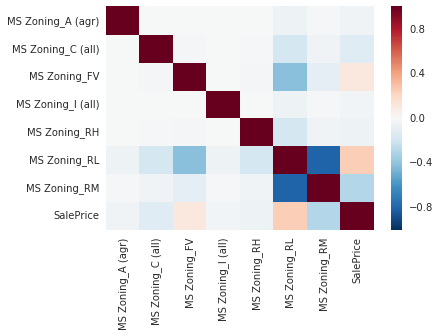

In [73]:
cols = ['MS Zoning']
dummy_df = pd.get_dummies(non_num_cols[cols])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

hard to say if there is any correlation. This column would be retained.

`Ms SubClass` column contains values about the house type and style. This is already captured in the column `Yr Built` and `2nd Flr SF`. So this feature can be dropped.

In [74]:
non_num_cols['Street'].value_counts()

Pave    2918
Grvl      12
Name: Street, dtype: int64

`Street` can be removed as 99% of the value is Paved.

In [75]:
non_num_cols['Lot Shape'].value_counts()

Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64

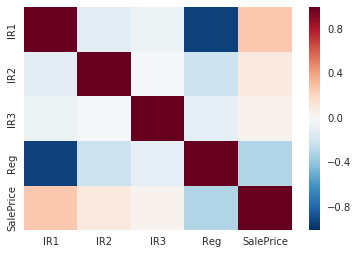

In [76]:
dummy_df = pd.get_dummies(non_num_cols['Lot Shape'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

`Lot Shape` will be reaplced with binary value of `1` or `0`. `1` indicates regualar lot.

In [77]:
non_num_cols['Land Contour'].value_counts()

Lvl    2633
HLS     120
Bnk     117
Low      60
Name: Land Contour, dtype: int64

Almost 90% values are Level. So this column will be discarded.

In [78]:
non_num_cols['Utilities'].value_counts()

AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

Most of the values are `AllPub` in the column `Utilities`. So this column will be discarded.

In [79]:
non_num_cols['Lot Config'].value_counts()

Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64

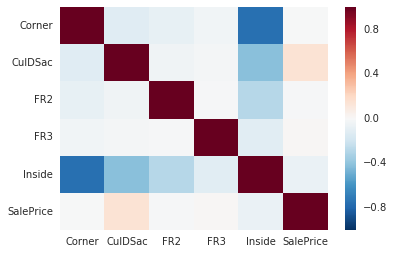

In [80]:
dummy_df = pd.get_dummies(non_num_cols['Lot Config'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

In [81]:
dummy_df = pd.get_dummies(non_num_cols['Lot Config'])
dummy_df.join(houses['SalePrice']).corr()

,Corner,CulDSac,FR2,FR3,Inside,SalePrice
Corner,1.000000,-0.117588,-0.079444,-0.031847,-0.756460,-0.004829
CulDSac,-0.117588,1.000000,-0.044222,-0.017727,-0.421079,0.143293
FR2,-0.079444,-0.044222,1.000000,-0.011977,-0.284487,-0.014441
FR3,-0.031847,-0.017727,-0.011977,1.000000,-0.114042,0.013741
Inside,-0.756460,-0.421079,-0.284487,-0.114042,1.000000,-0.070081
SalePrice,-0.004829,0.143293,-0.014441,0.013741,-0.070081,1.000000


`Lot Config` seems to have low corr with SalePrice. THis column will be discarded.

In [82]:
non_num_cols['Land Slope'].value_counts()

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

95% values are `Gtl`. So `Land Slope` will be removed from analysis 

In [83]:
non_num_cols['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [84]:
non_num_cols['Condition 1'].value_counts()

Norm      2522
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition 1, dtype: int64

In [85]:
non_num_cols['Condition 2'].value_counts()

Norm      2900
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition 2, dtype: int64

`Condition 1 and condition 2` will not be considered as most of the values are `Norm`.

In [86]:
non_num_cols['Bldg Type'].value_counts()

1Fam      2425
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: Bldg Type, dtype: int64

Majority are type `1Fam`, arouind 82%. So `Bldg Type` will be removed as a feature.

In [87]:
non_num_cols['House Style'].value_counts()

1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

Number of floors in the house is captured in the `Liv Area` parameter. So this feature is also ignored.

In [88]:
non_num_cols['Roof Style'].value_counts()

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

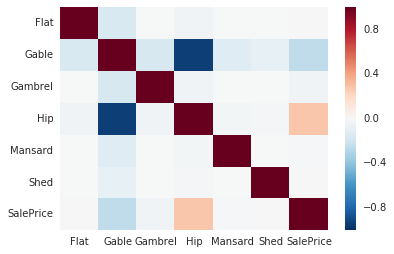

In [89]:
dummy_df = pd.get_dummies(non_num_cols['Roof Style'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

Due to low number of variety, `Roof Style` will be removed.

In [90]:
non_num_cols['Roof Matl'].value_counts()

CompShg    2887
Tar&Grv      23
WdShake       9
WdShngl       7
ClyTile       1
Metal         1
Membran       1
Roll          1
Name: Roof Matl, dtype: int64

Majority have `CompShg`, so `Roof Matl` is removed from analysis.

In [91]:
non_num_cols['Exterior 1st'].value_counts()

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     420
Plywood     221
CemntBd     126
BrkFace      88
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
Stone         2
AsphShn       2
PreCast       1
ImStucc       1
Name: Exterior 1st, dtype: int64

In [92]:
non_num_cols['Exterior 2nd'].value_counts()

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     274
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
PreCast       1
Name: Exterior 2nd, dtype: int64

In [93]:
non_num_cols[['Exterior 1st', 'Exterior 2nd']].head()

,Exterior 1st,Exterior 2nd
0,BrkFace,Plywood
1,VinylSd,VinylSd
2,Wd Sdng,Wd Sdng
3,BrkFace,BrkFace
4,VinylSd,VinylSd


In [94]:
(non_num_cols['Exterior 1st'] == non_num_cols['Exterior 2nd']).value_counts()

True     2488
False     442
dtype: int64

In 85% of the cases, both exteriors have the same value. So retaining both is not required. Correlation is checked next.

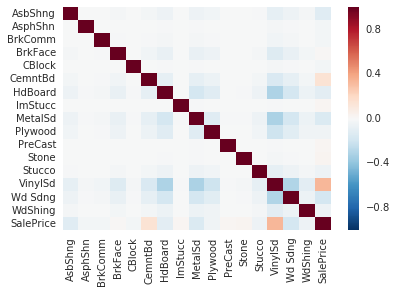

In [95]:
dummy_df = pd.get_dummies(non_num_cols['Exterior 1st'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

In [96]:
non_num_cols['Mas Vnr Type'].value_counts()

None       1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [97]:
non_num_cols['Exter Qual'].value_counts()

TA    1799
Gd     989
Ex     107
Fa      35
Name: Exter Qual, dtype: int64

In [98]:
non_num_cols['Exter Cond'].value_counts()

TA    2549
Gd     299
Fa      67
Ex      12
Po       3
Name: Exter Cond, dtype: int64

`Exter Qual` column will be removed as present condition is more indicative of price. The present condition of external material is `Typical Average` for 87% of the entries. So `Exter Cond` column will be discarded. 

In [99]:
non_num_cols['Foundation'].value_counts()

PConc     1310
CBlock    1244
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

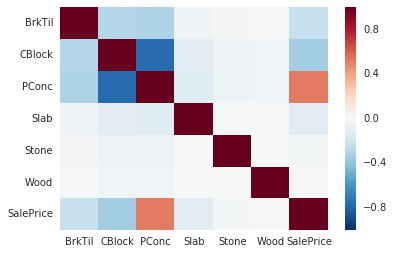

In [100]:
dummy_df = pd.get_dummies(non_num_cols['Foundation'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

`Foundation` will be dummied but `Slab, Stone and Wood` will be removed as there are low number of entries with this values and hence has low correlation.

In [101]:
cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1']
non_num_cols['Bsmt Qual'].value_counts()

TA      1283
Gd      1219
Ex       258
Fa        88
None      80
Po         2
Name: Bsmt Qual, dtype: int64

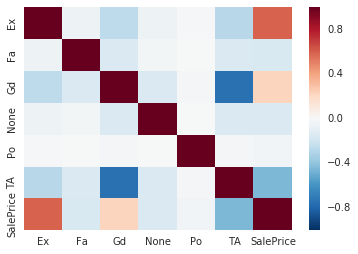

In [102]:
dummy_df = pd.get_dummies(non_num_cols['Bsmt Qual'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

`Good and Excellent` has posisitive correlation but `Typical Average` has negative correlation. Onyl these values will be retained. The other three columns iwll be removed.

In [103]:
non_num_cols['Bsmt Cond'].value_counts()

TA      2616
Gd       122
Fa       104
None      80
Po         5
Ex         3
Name: Bsmt Cond, dtype: int64

`Bsmt Cond` feature will be discarded.

In [104]:
non_num_cols['Bsmt Exposure'].value_counts()

No    1989
Av     418
Gd     284
Mn     239
Name: Bsmt Exposure, dtype: int64

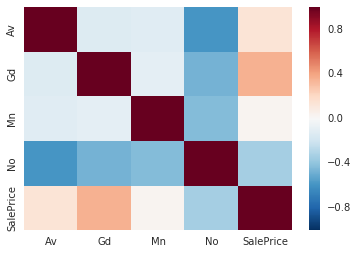

In [105]:
dummy_df = pd.get_dummies(non_num_cols['Bsmt Exposure'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

Seems to have low correlation. Data is also shown by other columns. So `Bsmt Exposure` feature is discarded.

In [106]:
non_num_cols['BsmtFin Type 1'].value_counts()

GLQ     859
Unf     851
ALQ     429
Rec     288
BLQ     269
LwQ     154
None     80
Name: BsmtFin Type 1, dtype: int64

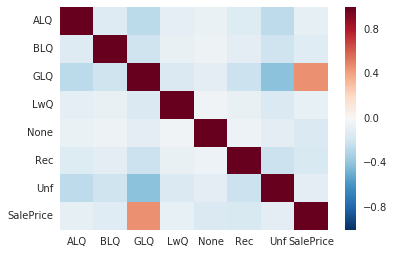

In [107]:
dummy_df = pd.get_dummies(non_num_cols['BsmtFin Type 1'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

Only `GLQ` is correalted with `SalePrice`. Lets check if this column is correalted with column `Bsmt Qual`

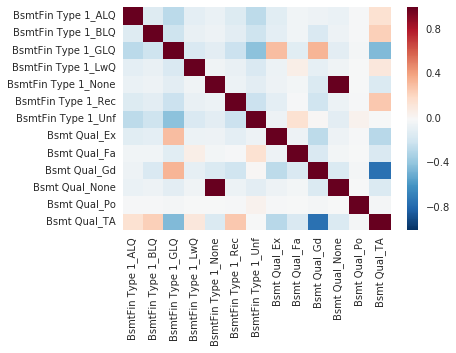

In [108]:
dummy_df = pd.get_dummies(non_num_cols[['BsmtFin Type 1', 'Bsmt Qual']])
sns.heatmap(dummy_df.corr())

`BsmtFin Type 1 GLQ` is correlated with `Bsmt Qual Good and Excellent`. So same information given by `BsmtFin Type 1` is captured by `Bsmt Qual`. So `Bsmt Fin Type 1` is discarded.

In [109]:
non_num_cols['Heating'].value_counts()

GasA     2885
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

Column `Heating` will be discarded as most have value `GasA`.

In [110]:
non_num_cols['Heating QC'].value_counts()

Ex    1495
TA     864
Gd     476
Fa      92
Po       3
Name: Heating QC, dtype: int64

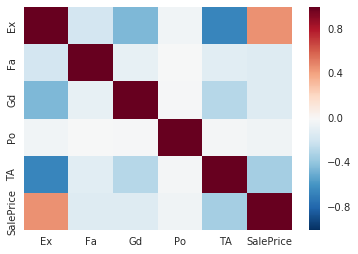

In [111]:
dummy_df = pd.get_dummies(non_num_cols['Heating QC'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

Having `Ex` as `Heating QC` has correlation with `SalePrice`. So that would be retained.

In [112]:
non_num_cols['Central Air'].value_counts()

Y    2734
N     196
Name: Central Air, dtype: int64

`Central Air` will be discared as 93% values are `Y`

In [113]:
non_num_cols['Electrical'].value_counts()

SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

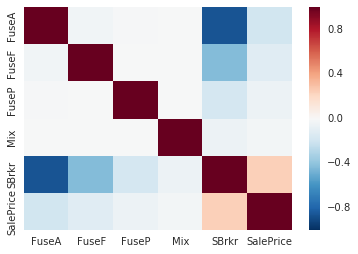

In [114]:
dummy_df = pd.get_dummies(non_num_cols['Electrical'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

Due to low number of different values (91% is same value), this column will be discarded.

In [115]:
non_num_cols['Kitchen Qual'].value_counts()

TA    1494
Gd    1160
Ex     205
Fa      70
Po       1
Name: Kitchen Qual, dtype: int64

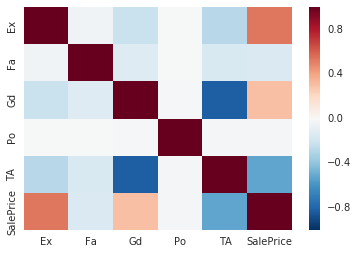

In [116]:
dummy_df = pd.get_dummies(non_num_cols['Kitchen Qual'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

`Ta, Gd and Ex` values will be retained for `Kitchen Qual`

In [117]:
non_num_cols['Functional'].value_counts()

Typ     2728
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Sal        2
Name: Functional, dtype: int64

93% of values is `Typ`. So `Functional` column will be removed.

In [118]:
non_num_cols['Garage Type'].value_counts()

Attchd     1731
Detchd      782
BuiltIn     186
No          157
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

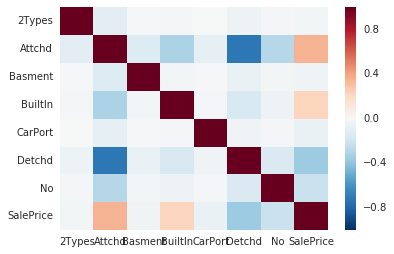

In [119]:
dummy_df = pd.get_dummies(non_num_cols['Garage Type'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

`garage Type` will be reatined with `Attchd, Builtin, Detchd, No`.

In [120]:
non_num_cols['Garage Finish'].value_counts()

Unf    1231
RFn     812
Fin     728
No      159
Name: Garage Finish, dtype: int64

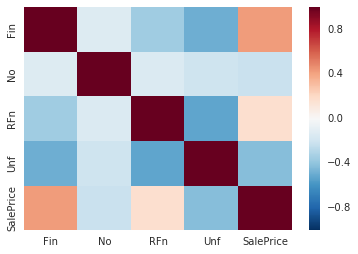

In [121]:
dummy_df = pd.get_dummies(non_num_cols['Garage Finish'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

`garage Finish` will be retained but only `Fin and Unf`

In [122]:
non_num_cols['Garage Qual'].value_counts()

TA    2615
No     159
Fa     124
Gd      24
Po       5
Ex       3
Name: Garage Qual, dtype: int64

In [123]:
non_num_cols['Garage Cond'].value_counts()

TA    2665
No     159
Fa      74
Gd      15
Po      14
Ex       3
Name: Garage Cond, dtype: int64

`Garage Qual and Garage Cond` columns will be removed.

In [124]:
non_num_cols['Paved Drive'].value_counts()

Y    2652
N     216
P      62
Name: Paved Drive, dtype: int64

`Paved Drive` will be removed as most values are `Y`

In [125]:
non_num_cols['Sale Type'].value_counts()

WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: Sale Type, dtype: int64

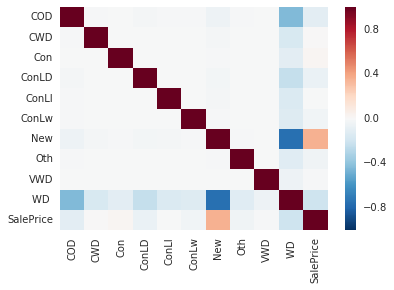

In [126]:
dummy_df = pd.get_dummies(non_num_cols['Sale Type'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

In [127]:
houses[['Year Built', 'Year Remod/Add']][non_num_cols['Sale Type'] == 'New']

,Year Built,Year Remod/Add
17,2010,2010
36,2009,2010
38,2009,2010
39,2009,2010
40,2005,2005
44,2009,2010
45,2009,2010
67,2009,2010
99,2009,2009
104,2010,2010


In `Sale Type` feature, `New` has relation with the `SalePrice` but this information is captured in the `Year Built` or `Year Remod/Add` feature. So `Sale Type` column is removed.

In [128]:
non_num_cols['Overall Qual'].value_counts()

5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: Overall Qual, dtype: int64

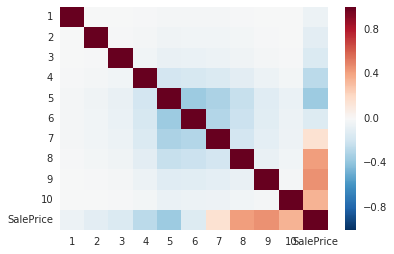

In [129]:
dummy_df = pd.get_dummies(non_num_cols['Overall Qual'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

In [130]:
non_num_cols['Overall Cond'].value_counts()

5    1654
6     533
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: Overall Cond, dtype: int64

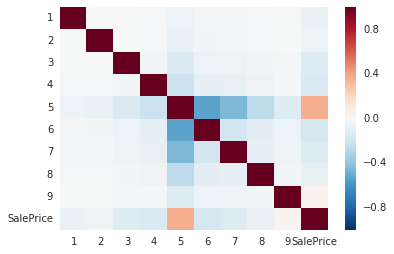

In [131]:
dummy_df = pd.get_dummies(non_num_cols['Overall Cond'])
sns.heatmap(dummy_df.join(houses['SalePrice']).corr())

In [132]:
houses[['Overall Qual', 'Overall Cond', 'SalePrice']].corr()

,Overall Qual,Overall Cond,SalePrice
Overall Qual,1.000000,-0.094812,0.799262
Overall Cond,-0.094812,1.000000,-0.101697
SalePrice,0.799262,-0.101697,1.000000


`Overall Qual` has correlation with `SalePrice` but not `Overall Cond`. So only `Overall Qual` will be retained.

Columns to discard
* MS SubClass
* Street
* Land Contour
* Utilities
* Lot Config
* Land Slope
* Condition 1
* Condition 2
* Bldg Type
* House Style
* Roof Style
* Roof Matl
* Exterior 2nd
* Exter Qual
* Exter Cond
* Bsmt Cond
* Bsmt Exposure
* Bsmt Fin Type 1
* Heating
* Central Air
* Electrical
* Functional
* Garage Qual
* Garage Cond
* Paved Drive
* Sale Type
* Overall Cond

Columns to modify
* Lot Shape - replace with 1 or 0
* Foundation - dummy column but `Slab, Stone and Wood` would be removed.
* Bsmt Qual - dummy column for `Gd, Ex, TA` will be retained.
* Heating QC - dummy column but only `Ex` will be retained.
* Kitchen Qual - dummy column for `Gd, Ex, TA` will be retained.
* Garage Type will be retained with `Attchd, Builtin, Detchd, No`.
* Garage Finish - dummy but only `Fin and Unf`

Columns Retained
* Neighborhood
* Exterior 1st
* Mas Vnr Type
* Overall Qual

### Conclusion

Feature exploration has come to an end now. The following columns will be used for analysis

**15 Numerical Columns** - Lot Area, 2nd Flr SF, Bsmt Full Bath, Half Bath, Open Porch SF, Wood Deck SF, Lot Frontage, BsmtFin SF 1, Fireplaces, TotRms AbvGrd, Mas Vnr Area, Full Bath, Year Built, Years since remodeled, 1st Flr SF, Garage Cars

**11 Categorical Columns** - Neighborhood, Exterior 1st, Mas Vnr Type, Overall Qual, Lot Shape, Foundation, Bsmt Qual, Heating QC, Kitchen Qual, Garage Type, Garage Finish

In [133]:
transform_features(houses).head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,years_since_remodeled,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0.000000,0.000000,0,RL,0.410959,0.142420,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,0.555556,0.5,0.637681,50,Hip,CompShg,BrkFace,Plywood,Stone,0.0700,TA,TA,CBlock,TA,Gd,Gd,BLQ,0.113218,Unf,0.000000,0.188784,0.176759,GasA,Fa,Y,SBrkr,0.277673,0.000000,0.0,0.249058,0.333333,0.0,0.25,0.0,0.375,0.333333,TA,0.384615,Typ,0.50,Attchd,0.208333,Fin,0.4,0.354839,TA,TA,P,0.147472,0.083558,0.0,0.0,0.000000,0.0,0.000000,0.363636,1.0,WD,Normal,215000
1,0.000341,0.000102,0,RH,0.202055,0.048246,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,0.444444,0.625,0.644928,49,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,CBlock,TA,TA,No,Rec,0.082920,LwQ,0.094364,0.115582,0.144354,GasA,TA,Y,SBrkr,0.118042,0.000000,0.0,0.105878,0.000000,0.0,0.25,0.0,0.250,0.333333,TA,0.230769,Typ,0.00,Attchd,0.211538,Unf,0.2,0.490591,TA,TA,Y,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,WD,Normal,105000
2,0.000683,0.000104,0,RL,0.205479,0.060609,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,0.555556,0.625,0.623188,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.0675,TA,TA,CBlock,TA,TA,No,ALQ,0.163536,Unf,0.000000,0.173801,0.217512,GasA,TA,Y,SBrkr,0.208990,0.000000,0.0,0.187453,0.000000,0.0,0.25,0.5,0.375,0.333333,Gd,0.307692,Typ,0.00,Attchd,0.201923,Unf,0.2,0.209677,TA,TA,Y,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,WD,Normal,172000
3,0.001024,0.000108,0,RL,0.246575,0.046087,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,0.666667,0.5,0.695652,42,Hip,CompShg,BrkFace,BrkFace,None,0.0000,Gd,TA,CBlock,TA,TA,No,ALQ,0.188696,Unf,0.000000,0.447346,0.345336,GasA,Ex,Y,SBrkr,0.373031,0.000000,0.0,0.334589,0.333333,0.0,0.50,0.5,0.375,0.333333,Ex,0.461538,Typ,0.50,Attchd,0.233974,Fin,0.4,0.350806,TA,TA,Y,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.272727,1.0,WD,Normal,244000
4,0.001366,0.001672,0.235294,RL,0.181507,0.058566,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,0.444444,0.5,0.905797,12,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,PConc,Gd,TA,No,GLQ,0.140149,Unf,0.000000,0.058647,0.151882,GasA,Gd,Y,SBrkr,0.124764,0.339467,0.0,0.243971,0.000000,0.0,0.50,0.5,0.375,0.333333,TA,0.307692,Typ,0.25,Attchd,0.326923,Fin,0.4,0.323925,TA,TA,Y,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,WD,Normal,189900


In [134]:
transform_features(houses).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
Order                    2930 non-null float64
PID                      2930 non-null float64
MS SubClass              2930 non-null object
MS Zoning                2930 non-null object
Lot Frontage             2930 non-null float64
Lot Area                 2930 non-null float64
Street                   2930 non-null object
Lot Shape                2930 non-null object
Land Contour             2930 non-null object
Utilities                2930 non-null object
Lot Config               2930 non-null object
Land Slope               2930 non-null object
Neighborhood             2930 non-null object
Condition 1              2930 non-null object
Condition 2              2930 non-null object
Bldg Type                2930 non-null object
House Style              2930 non-null object
Overall Qual             2930 non-null object
Overall Cond             2930 non-null object
Year Built     

### Verify transform_features function
`transform_features` function has been tested. It returns a dataframe with no null values.

In [135]:
select_features(transform_features(houses)).head()

,Lot Area,2nd Flr SF,Bsmt Full Bath,Half Bath,Open Porch SF,Wood Deck SF,Lot Frontage,BsmtFin SF 1,Fireplaces,TotRms AbvGrd,Mas Vnr Area,Full Bath,Year Built,years_since_remodeled,1st Flr SF,Garage Cars,Overall Qual,Lot Shape,Heating QC,Garage Finish,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Bsmt Qual_Gd,Bsmt Qual_Ex,Bsmt Qual_TA,Kitchen Qual_Gd,Kitchen Qual_Ex,Kitchen Qual_TA,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_Detchd,Garage Type_None,SalePrice
0,0.142420,0.000000,0.333333,0.0,0.083558,0.147472,0.410959,0.113218,0.50,0.384615,0.0700,0.25,0.637681,50,0.277673,0.4,0.555556,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,215000
1,0.048246,0.000000,0.000000,0.0,0.000000,0.098315,0.202055,0.082920,0.00,0.230769,0.0000,0.25,0.644928,49,0.118042,0.2,0.444444,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,105000
2,0.060609,0.000000,0.000000,0.5,0.048518,0.275983,0.205479,0.163536,0.00,0.307692,0.0675,0.25,0.623188,52,0.208990,0.2,0.555556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,172000
3,0.046087,0.000000,0.333333,0.5,0.000000,0.000000,0.246575,0.188696,0.50,0.461538,0.0000,0.50,0.695652,42,0.373031,0.4,0.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,244000
4,0.058566,0.339467,0.000000,0.5,0.045822,0.148876,0.181507,0.140149,0.25,0.307692,0.0000,0.50,0.905797,12,0.124764,0.4,0.444444,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,189900


In [136]:
select_features(transform_features(houses)).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
Lot Area                 2930 non-null float64
2nd Flr SF               2930 non-null float64
Bsmt Full Bath           2930 non-null float64
Half Bath                2930 non-null float64
Open Porch SF            2930 non-null float64
Wood Deck SF             2930 non-null float64
Lot Frontage             2930 non-null float64
BsmtFin SF 1             2930 non-null float64
Fireplaces               2930 non-null float64
TotRms AbvGrd            2930 non-null float64
Mas Vnr Area             2930 non-null float64
Full Bath                2930 non-null float64
Year Built               2930 non-null float64
years_since_remodeled    2930 non-null int64
1st Flr SF               2930 non-null float64
Garage Cars              2930 non-null float64
Overall Qual             2930 non-null object
Lot Shape                2930 non-null int64
Heating QC               2930 non-null int64
Garage 

### select_features testing
`select_features` function has been tested and it returns a dataframe with 83 columns.

In [137]:
houses_transform = transform_features(houses)
train_and_test(houses_transform, 0)

36625.92

In [138]:
houses_transform = transform_features(houses)
train_and_test(houses_transform, 1)

29892.33

In [139]:
houses_transform = transform_features(houses)
train_and_test(houses_transform, 5)

30180.54

### train_and_test function testing
`train_and_test` function works but the RMSE is ~30000. Lets see if we can reduce that figure by removing features.

In [140]:
def train_and_test_cross_validate(X, y, k, random_state=True):
    #df = df.copy()
    #target = 'SalePrice'
    if random_state:
        rand = {}
    else:
        rand = {'random_state': 1}
    model = LinearRegression()
    kf = KFold(k, shuffle=True, **rand)
    mses = cross_val_score(model, X, y, 
                           scoring='neg_mean_squared_error', cv=kf)
    
    rmse = np.round(np.mean(np.sqrt(np.abs(mses))), 2)
    
    return rmse

In [141]:
houses_transform = transform_features(houses)
houses_select = select_features(houses_transform)
houses_target = houses_select['SalePrice']

# Find correlation between features and SalePrice
features_corr = houses_select.corr().iloc[:, -1].apply(np.abs)
features_descending_corr = features_corr.sort_values(ascending=False).index[1:]

rmse_feature = []
for n in range(0, len(features_descending_corr)):
    cols = features_descending_corr[:n+1]
    rmse_feature.append(train_and_test_cross_validate(houses_select[cols],
                                                     houses_target, 5,
                                                     random_state=False))

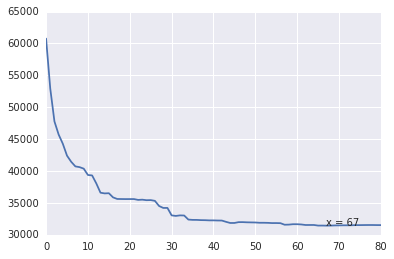

In [142]:
fig, axs = plt.subplots()
x = np.arange(0, len(features_descending_corr))
axs.plot(x, rmse_feature)
min_x = x[np.argmin(rmse_feature)]
min_y = np.min(rmse_feature)
axs.annotate('x = {}'.format(min_x), (min_x, min_y))

After 67 features, the RMSE value slightly increases. It was done with a fixed random state to verify the workin of the function. Lets run it in random state and average it to see where min RMSE lies.

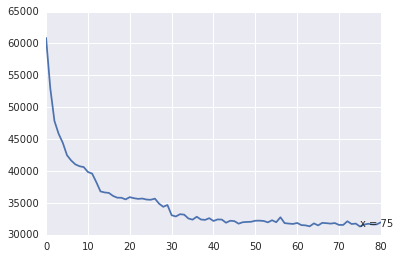

In [143]:
houses_transform = transform_features(houses)
houses_select = select_features(houses_transform)
houses_target = houses_select['SalePrice']

# Find correlation between features and SalePrice
features_corr = houses_select.corr().iloc[:, -1].apply(np.abs)
features_descending_corr = features_corr.sort_values(ascending=False).index[1:]

rmse_feature = []
for n in range(0, len(features_descending_corr)):
    cols = features_descending_corr[:n+1]
    rmse_rand = []
    for _ in range(2):
        rmse = train_and_test_cross_validate(houses_select[cols],
                                         houses_target, 5,
                                         random_state=True)
        rmse_rand.append(rmse)
    rmse_feature.append(np.mean(rmse_rand))

    
fig, axs = plt.subplots()
x = np.arange(0, len(features_descending_corr))
axs.plot(x, rmse_feature)
min_x = x[np.argmin(rmse_feature)]
min_y = np.min(rmse_feature)
axs.annotate('x = {}'.format(min_x), (min_x, min_y))

At 75 features we get the lowest RMSE, but after 30 features, the gain is minimal.